# Plot results of proxy sensitivity test

### Load DA outcomes for D47 and d18Oc assimilation only

In [ ]:
D47_only_outcomes 

### Combined plot of measurements, priors and posteriors with precision uncertainties

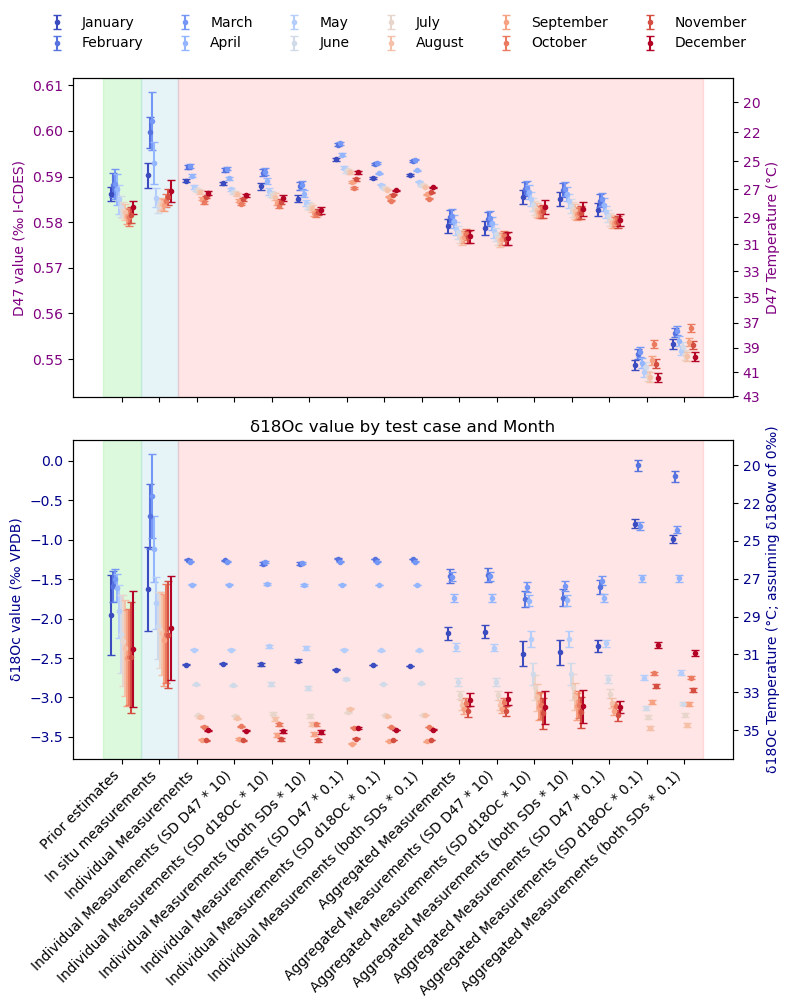

In [ ]:
fig, (ax1, ax3) = plt.subplots(
    2, 1, figsize=(8, 10), sharex='col'
)
fig.subplots_adjust(hspace=0.1, wspace=0.25)  # reduce vertical & horizontal spacing

# Define a colormap across all months
cmap = plt.cm.coolwarm
colors = [cmap(i / (len(months)-1)) for i in range(len(months))]
color_dict = dict(zip(months, colors))

# Define offsets for x-axis to avoid overlapping error bars
x_offsets = np.linspace(-0.3, 0.3, len(months))

# Define x values for each data type
x_values = np.arange(len(all_uncertainty_test_table_df.index))

# --- D47 plot ---
for month in months:
    ax1.errorbar(
        x = x_values + x_offsets[months.index(month)],
        y = all_uncertainty_test_table_df[f"{month} D47 Mean"],
        yerr = all_uncertainty_test_table_df[f"{month} D47 Std"],
        capsize = 3,
        fmt='.',
        label=month,
        color=color_dict[month]
    )
# Add light green rectangle to highlight prior
ax1.add_patch(
    Rectangle(
        (-0.5, ax1.get_ylim()[0]),  # (x,y)
        1,                          # width
        ax1.get_ylim()[1] - ax1.get_ylim()[0],  # height
        color='lightgreen',
        alpha=0.3,
    )
)
# Add light blue rectangle to highlight measurement
ax1.add_patch(
    Rectangle(
        (0.5, ax1.get_ylim()[0]),  # (x,y)
        1,                          # width
        ax1.get_ylim()[1] - ax1.get_ylim()[0],  # height
        color='lightblue',
        alpha=0.3,
    )
)
# Add light red rectangle to highlight posteriors
ax1.add_patch(
    Rectangle(
        (1.5, ax1.get_ylim()[0]),  # (x,y)
        14,         # width
        ax1.get_ylim()[1] - ax1.get_ylim()[0],  # height
        color='red',
        alpha=0.1,
    )
)
ax1.set_xticks(x_values)
ax1.set_xticklabels(all_uncertainty_test_table_df.index, rotation=45, ha="right")
# ax1.set_xlabel('test case')
ax1.set_ylabel('D47 value (‰ I-CDES)', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# Secondary axis for temperature
ax1_temp = ax1.twinx()
ax1_temp.set_ylabel('D47 Temperature (°C)', color='purple')
ax1_temp.tick_params(axis='y', labelcolor='purple')
ax1_temp.set_yticks(
    ticks = D47c.OGLS23.T47(T = np.linspace(0, 50, 25))[0],
    labels = np.linspace(0, 50, 25).astype(int)
)
ax1_temp.set_ylim(ax1.get_ylim())

# --- δ18Oc Plot ---

for month in months:
    ax3.errorbar(
        x = x_values + x_offsets[months.index(month)],
        y = all_uncertainty_test_table_df[f"{month} d18Oc Mean"],
        yerr = all_uncertainty_test_table_df[f"{month} d18Oc Std"],
        capsize = 3,
        fmt='.',
        label=month,
        color=color_dict[month]
    )
# Add light green rectangle to highlight prior
ax3.add_patch(
    Rectangle(
        (-0.5, ax3.get_ylim()[0]),  # (x,y)
        1,                          # width
        ax3.get_ylim()[1] - ax3.get_ylim()[0],  # height
        color='lightgreen',
        alpha=0.3,
    )
)
# Add light blue rectangle to highlight measurement
ax3.add_patch(
    Rectangle(
        (0.5, ax3.get_ylim()[0]),  # (x,y)
        1,                          # width
        ax3.get_ylim()[1] - ax3.get_ylim()[0],  # height
        color='lightblue',
        alpha=0.3,
    )
)
# Add light red rectangle to highlight posteriors
ax3.add_patch(
    Rectangle(
        (1.5, ax3.get_ylim()[0]),  # (x,y)
        14,         # width
        ax3.get_ylim()[1] - ax3.get_ylim()[0],  # height
        color='red',
        alpha=0.1,
    )
)
ax3.set_xticks(x_values)
ax3.set_xticklabels(all_uncertainty_test_table_df.index, rotation=45, ha="right")
ax3.set_ylabel('δ18Oc value (‰ VPDB)', color='darkblue')
ax3.tick_params(axis='y', labelcolor='darkblue')

# Secondary axis for temperature, based on d18Oc-temperature conversion used above
ax3_temp = ax3.twinx()
ax3_temp.set_ylabel('δ18Oc Temperature (°C; assuming δ18Ow of 0‰)', color='darkblue')
ax3_temp.tick_params(axis='y', labelcolor='darkblue')
ax3_temp.set_yticks(
    ticks = ((20.6 - np.linspace(0, 50, 25)) / 4.34  - 0.27) + 0 + 0.27,
    labels = np.linspace(0, 50, 25).astype(int)
)
ax3_temp.set_ylim(ax3.get_ylim())
ax3.set_title('δ18Oc value by test case and Month')

# ---------------------------------------------------------
# Shared legend above all plots
handles1, labels1 = ax1.get_legend_handles_labels()
fig.legend(handles1, labels1,
           loc="upper center",
           bbox_to_anchor=(0.5, 1.01),
           ncol=len(months) / 2,
           frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.show()